# EXPLORING DATA

In [1]:
# libraries to describe de data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer 
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from nltk.probability import FreqDist
import random
import re


plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data understanding

### EDA: Tweets 2019

In [2]:
df_tweets = pd.read_csv('data/historic_tweets.csv') # read the csv file
df_key=pd.read_csv('data/key_words.csv') # read the csv file

In [3]:
df_tweets.head()

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,key_word
0,0,Me acordé que a los colombianos de mi ex trab...,itslilysa,"Andes, Colombia",2020-01-10 22:51:09+00:00,1215768064697999362,0,0,0,1215768064697999362,8
1,1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,LuzMarinaVelsq5,"Andes, Colombia",2020-01-10 22:06:30+00:00,1215756830246428672,0,1,0,1215743967326801922,8
2,2,En Tierragro sabemos que la labor en el campo...,TIERRAGRO,"Andes, Colombia",2020-01-10 19:59:40+00:00,1215724912960294917,1,1,0,1215724912960294917,8
3,3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,3puntospublicid,"Andes, Colombia",2020-01-10 19:17:54+00:00,1215714400289677313,0,0,0,1214949391913684998,8
4,4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,HMadrid911,"Andes, Colombia",2020-01-10 18:09:24+00:00,1215697162471989248,0,1,1,1215388060294287361,8


In [4]:
df_key.head(10)

,id_key_word,key_word
0,1,cultura
1,2,empresa
2,3,jovenes
3,4,metro
4,5,movilidad
5,6,seguridad
6,7,tecnologia
7,8,trabajo
8,9,vida


In [5]:
df_tweets.rename(columns={'key_word':'id_key_word'}, inplace=True)
df_tweets.head()

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word
0,0,Me acordé que a los colombianos de mi ex trab...,itslilysa,"Andes, Colombia",2020-01-10 22:51:09+00:00,1215768064697999362,0,0,0,1215768064697999362,8
1,1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,LuzMarinaVelsq5,"Andes, Colombia",2020-01-10 22:06:30+00:00,1215756830246428672,0,1,0,1215743967326801922,8
2,2,En Tierragro sabemos que la labor en el campo...,TIERRAGRO,"Andes, Colombia",2020-01-10 19:59:40+00:00,1215724912960294917,1,1,0,1215724912960294917,8
3,3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,3puntospublicid,"Andes, Colombia",2020-01-10 19:17:54+00:00,1215714400289677313,0,0,0,1214949391913684998,8
4,4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,HMadrid911,"Andes, Colombia",2020-01-10 18:09:24+00:00,1215697162471989248,0,1,1,1215388060294287361,8


In [6]:
df_tweets=pd.merge(df_tweets, df_key, on='id_key_word')

In [7]:
df_tweets.shape # shows the number of rows and columns

(244502, 12)

In [8]:
df_tweets.info() # shows the data types of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244502 entries, 0 to 244501
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       244502 non-null  int64 
 1   full_text        244502 non-null  object
 2   user             244502 non-null  object
 3   location         244502 non-null  object
 4   date             244502 non-null  object
 5   tweet_id         244502 non-null  int64 
 6   number_rt        244502 non-null  int64 
 7   number_likes     244502 non-null  int64 
 8   number_reply     244502 non-null  int64 
 9   conversation_id  244502 non-null  int64 
 10  id_key_word      244502 non-null  int64 
 11  key_word         244502 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.3+ MB


In [9]:
df_tweets.describe() # shows the mean, std, min, max, etc. of each column

,Unnamed: 0,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word
count,244502.000000,2.445020e+05,244502.000000,244502.000000,244502.000000,2.445020e+05,244502.000000
mean,122250.500000,1.305647e+18,5.253282,15.979550,1.311777,1.305173e+18,5.480581
std,70581.792096,1.339278e+17,67.567581,237.782893,19.662006,1.344524e+17,2.705087
min,0.000000,1.079890e+18,0.000000,0.000000,0.000000,6.746151e+09,1.000000
25%,61125.250000,1.187798e+18,0.000000,0.000000,0.000000,1.187554e+18,3.000000
50%,122250.500000,1.297962e+18,0.000000,1.000000,0.000000,1.297586e+18,5.000000
75%,183375.750000,1.426530e+18,1.000000,4.000000,1.000000,1.426228e+18,8.000000
max,244501.000000,1.531424e+18,13921.000000,63276.000000,3655.000000,1.531424e+18,9.000000


#### Full text

In [10]:
df_tweets['full_text'].str.len().describe()

count    244502.000000
mean        197.266022
std          78.775039
min           6.000000
25%         134.000000
50%         209.000000
75%         263.000000
max         963.000000
Name: full_text, dtype: float64

In terms of tweet text length measured in characters, we found an average of 143 characters, a maximum of 689 characters and a minimum of 7 characters.

In [11]:
full_text_char = df_tweets['full_text'].str.len()

In [12]:
print(full_text_char.quantile(0.05))
print(full_text_char.quantile(0.25))
print(full_text_char.quantile(0.5))
print(full_text_char.quantile(0.75))
print(full_text_char.quantile(0.95))

66.0
134.0
209.0
263.0
297.0


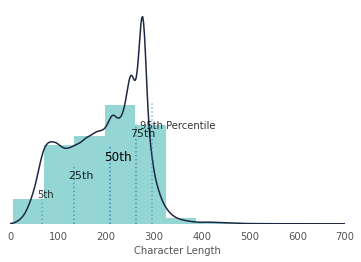

In [13]:
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_char.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

# Plot KDE
full_text_char.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_char.quantile(0.05), full_text_char.quantile(0.25), full_text_char.quantile(0.5), full_text_char.quantile(0.75), full_text_char.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-10, 0.001, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-13, 0.0017, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-13, 0.0024, "50th", size = 12, alpha = 1)
ax.text(quant_75-13, 0.0033, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-25, 0.0036, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Character Length",size = 10) 
ax.set_xlim(0, 700)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()

According to the graph above, we can find that the distribution is skewed to the right. There are more sensitive or controversial topics that require a greater extension of characters. For this, we move on to analyze the words within the tweet.

In [14]:
full_text_words=df_tweets['full_text'].str.split().str.len()

In [15]:
full_text_words.describe()

count    244502.000000
mean         31.184493
std          12.671146
min           1.000000
25%          21.000000
50%          32.000000
75%          41.000000
max         103.000000
Name: full_text, dtype: float64

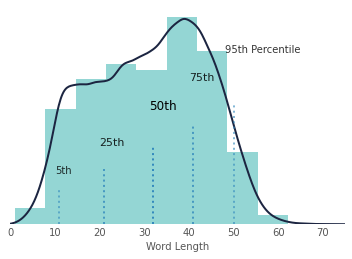

In [16]:
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_words.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

#kde
full_text_words.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_words.quantile(0.05), full_text_words.quantile(0.25), full_text_words.quantile(0.5), full_text_words.quantile(0.75), full_text_words.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-1, 0.007, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-1, 0.011, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-1, 0.016, "50th", size = 12, alpha = 1)
ax.text(quant_75-1, 0.020, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-2, 0.024, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Word Length",size = 10) 
ax.set_xlim(0, 75)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()

In terms of tweet text length measured in words, we found an average of 22 words, a maximum of 75 words and a minimum of 1 word. 

We observe the same behavior when we look at the distribution in terms of words. We will proceed to review the tweets that contain the minimum and maximum number of words.

In [17]:
data_tweet=df_tweets.copy() # copy the dataframe
data_tweet['num_words']=df_tweets['full_text'].str.split().str.len() # create a new column with the number of words in each tweet
data_tweet['num_char']=df_tweets['full_text'].str.len() # create a new column with the number of characters in each tweet

In [18]:
data_tweet['num_words'].value_counts().reset_index().sort_values(by='index',ascending=False) # shows the number of words in each tweet

,index,num_words
98,103,1
97,101,1
96,100,1
81,99,2
82,98,2
...,...,...
51,5,625
53,4,410
56,3,219
59,2,109


In [19]:
data_tweet[['full_text','num_words']][data_tweet['num_words']<=2].sort_values(by='num_words').sample(10, random_state=6)

,full_text,num_words
201335,Maravilloso!!!,1
44229,bueeeeno...... !,2
51968,Malparidos🤬🤬,1
159364,Medellín,1
145346,MÚSICA ACADÉMICA,2
55553,Colibrí Bar,2
119419,Ruben Rios,2
213211,FANTASTICO,1
243870,MOVILIDAD MEDELLÍN,2
159158,@alexanderr2088 Saludos,2


In [20]:
data_tweet[['full_text','num_words']][data_tweet['num_words']<=2].sort_values(by='num_words').sample(10) # shows the tweets with 75 words or 1 word

,full_text,num_words
52044,Jueputa vida,2
36991,Vamos podemos,2
37192,Emprendimiento 💥💥💥,2
153900,Buenas noticias.,2
191820,JAJAJAJAJAJA,1
220279,DIOS PORQUE...,2
157631,Maravilloso.,1
30799,Analista Contable,2
39277,Orgullo paisa,2
191834,Ahh bueno...,2


We can observe how the tweets with fewer words (2 or less), the word "Medellin" is the most recurrent. This is because it is our main search topic. In the case of tweets with exactly two words, "Medellin" appears accompanied by a mention, an emoticon, a year, among others.

In [21]:
data_tweet.loc[8374,'full_text'] # shows the tweet with the index 8374

' Y si me sale un buen trabajo en Medellín, sería mucho pedir?'

In [22]:
list=[65,67,69,75]
data_large=data_tweet[['tweet_id','full_text','num_words']][(data_tweet['num_words']).isin(list)].sort_values(by='num_words') # shows the tweets with the words 65, 67, 69

In [23]:
data_large

,tweet_id,full_text,num_words
123063,1262118697159794692,@aralfa21 @Valledupar_Col @enteratevpar @red_...,65
85309,1280453057629892609,@emecorrea @DIM_Oficial @minuto30com @humopod...,65
89808,1320005755001573377,@brisa7766433br1 @SinLaMente @Oscarperiodista...,65
239727,1417193662992293889,@Mayo_Hemelson @Resistenciahera @NuevaEPSOfic...,65
123694,1280628661394251778,@ljdr7 @ELIHARKONNEN @CamiloGuerreroB @Pedro4...,65
...,...,...,...
31772,1489708103163686919,@camivillamizar @QuinteroCalle @metrodela80 @...,69
133604,1458548060632588289,@AmLuiissa @JorgeCa37857757 @VivianaUribista ...,69
151156,1093520307145584647,@TmArredondo @EmisoraUMFM @piedrahitangela @C...,69
89959,1318632714795470853,@richizuluaga @Pedro47276558 @EmmaRueda9 @ult...,69


In [24]:
print(data_large.iloc[0,1],"\n"+"-"*20,data_large.iloc[1,1],"\n"+"-"*20,data_large.iloc[2,1],"\n"+"-"*20,data_large.iloc[3,1])

 @aralfa21 @Valledupar_Col @enteratevpar @red_emer @RadioGuatapuri @SaborVnato @huguesvega16 @Andy_RomeroC @VocalDeControl @alex86010 @EnriqueCamargo2 @JoacoMartinezU @royberdf @fredcam90 @reynasr @Andrsaguilarbur Solo 2 ciudades que tiene empresa de energía propia. Por el momento esta pereira y en esto dia lo hará la alcaldía de Medellín con su empresa epm. Aquí no tenemos así que arturo saque de su bolsillo para pagar. El gobierno nacional debe hacer los convenio con electricaribe 
--------------------  @emecorrea @DIM_Oficial @minuto30com @humopoderosoDIM @MundoDIM @ORGULLOSODIM @AMOALDIM @ancaleb @SHDIM_ @InfoDIM @alrojovivodim @AlDiaDIM @RXNoficial Mauricio, hacia 7 meses que nadie sacaba unas lágrimas. Gracias tu escrito sagrada me devuelve las ganas de seguir en esta vida y nunca cambiar mi amor por el Dim. Cada recuerdo de mi rojo y su gente poderosa me saca una sonrisa y sabes porqué. " mi felicidad se llama Medellin" 
--------------------  @brisa7766433br1 @SinLaMente @Oscarp

When looking at the texts with greater word length, we highlight two points: 
1. The large use of mentions using the at-word extends the length of the tweet and would not provide relevant information for sentiment analysis so deletion could be considered.
2. Something to keep in mind when including Medellin in the text of the tweet is that this may not only refer to the city, but also to the soccer team "Deportivo Independiente Medellin" so we must know how to differentiate this if we want to draw conclusions.
3. The tweets with fewer words associate their text with the word "Medellin" accompanied by something else, this alone would not be relevant for our analysis so it could be given a special treatment. 

#### Number of likes

In [25]:
data_tweet.sort_values(by='number_likes',ascending=False) # sorts the dataframe by the number of words in each tweet

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word,key_word,num_words,num_char
63689,68957,Con Kellyth Garces y su hijo Justin. Ella fue...,petrogustavo,"Medellín, Colombia",2022-05-29 00:41:28+00:00,1530710884892520448,13921,63276,3655,1530710884892520448,9,vida,35,187
208944,148038,Cada día me levanto para trabajar contra la p...,QuinteroCalle,"Medellín, Colombia",2021-05-19 14:52:55+00:00,1395029709939937282,5629,28435,2364,1395029709939937282,3,jovenes,38,230
56082,49903,He pedido a la Policía de Medellín no hacer u...,QuinteroCalle,"Medellín, Colombia",2019-11-26 15:52:14+00:00,1199355189565759488,4485,26676,2419,1199355189565759488,9,vida,36,224
180026,179257,Posibilidad de contagio en el Metro de Medell...,diegoalejocm,"Bogotá, D.C., Colombia",2020-03-09 15:00:36+00:00,1237030531533090816,3525,22137,279,1237030531533090816,4,metro,23,138
175576,172712,No van a creer a quien me encontré en el metr...,alejo_cueto,"Medellín, Colombia",2021-10-31 17:09:42+00:00,1454858127971598340,588,18592,52,1454858127971598340,4,metro,14,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114656,236060,Asesinado joven que desarrolló dron para medi...,lmejia357,"Medellín, Colombia",2019-03-30 04:39:47+00:00,1111850485286400001,0,0,0,1111850485286400001,6,seguridad,11,67
114658,236062,Esta seguridad de Federico me tiene sorprendi...,Katty97461795,"Medellín, Colombia",2019-03-30 03:40:42+00:00,1111835614675124224,0,0,0,1111835614675124224,6,seguridad,8,50
114659,236063,"@_El_Patriota ¿Que pasó don Jaime? , ¿no pues...",LoQueDigaElDedo,"Medellín, Colombia",2019-03-30 03:20:45+00:00,1111830595733196800,0,0,0,1111817218864627712,6,seguridad,34,187
114660,236064,@FicoGutierrez señor alcalde tengo una idea p...,Joat5hotmailCo1,"Medellín, Colombia",2019-03-30 03:15:45+00:00,1111829339513995264,0,0,0,1111829339513995264,6,seguridad,11,74


In [26]:
data_tweet.loc[11050,"full_text"] # shows the first tweet

' @Bancolombia Ya lo sabemos el asunto es que nos quitan un medio de pago y de trabajo. NO HAY DONDE COBRAR O CONSIGNAR UN CHEQUE EL DIA SABADO en la Central de Corabastos su oficina más rentable Y los cajeros siguen malos. Fuera en Medellín ya lo solucionaban pero a Bta nada. @SFCsupervisor'

#### Number of reply

In [27]:
data_tweet.sort_values(by='number_reply',ascending=False) # sorts the dataframe by the number of words in each tweet

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word,key_word,num_words,num_char
63689,68957,Con Kellyth Garces y su hijo Justin. Ella fue...,petrogustavo,"Medellín, Colombia",2022-05-29 00:41:28+00:00,1530710884892520448,13921,63276,3655,1530710884892520448,9,vida,35,187
56082,49903,He pedido a la Policía de Medellín no hacer u...,QuinteroCalle,"Medellín, Colombia",2019-11-26 15:52:14+00:00,1199355189565759488,4485,26676,2419,1199355189565759488,9,vida,36,224
208944,148038,Cada día me levanto para trabajar contra la p...,QuinteroCalle,"Medellín, Colombia",2021-05-19 14:52:55+00:00,1395029709939937282,5629,28435,2364,1395029709939937282,3,jovenes,38,230
218125,189096,Con lo que cuesta demoler el edificio de Pabl...,petrogustavo,"Medellín, Colombia",2019-02-21 22:59:54+00:00,1098718988161507328,1888,7030,1925,1098718988161507328,3,jovenes,48,264
30018,35205,Julián Orrego protestaba para que atendieran ...,CaracolMedellin,Universidad de Medellín,2019-12-03 19:11:20+00:00,1201942006576173056,729,1325,1828,1201942006576173056,8,trabajo,33,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93536,53280,Fico promete y promete como su programa bande...,carlosriosvilla,"Medellín, Colombia",2022-01-31 15:47:30+00:00,1488177124074741766,0,2,0,1488177124074741766,6,seguridad,36,214
93537,53281,@henrylopeza @lcvelez @AlvaroUribeVel @lafm P...,carlosriosvilla,"Medellín, Colombia",2022-01-31 15:44:12+00:00,1488176295997546504,0,2,0,1488128709718589448,6,seguridad,20,145
93540,53284,@lcvelez @AlvaroUribeVel @lafm Por supuesto q...,AmplioQuijote,"Medellín, Colombia",2022-01-31 13:47:22+00:00,1488146891716333568,0,0,0,1488128709718589448,6,seguridad,22,124
93542,53286,@QuinteroCalle Señor alcalde Daniel Quintero ...,Pablo782411,"Medellín, Colombia",2022-01-31 11:28:24+00:00,1488111920284590083,0,0,0,1488095893387550722,6,seguridad,47,296


In [28]:
data_tweet.loc[16498,"full_text"] # shows the first tweet

' Busca trabajo, está en Medellín.'

#### Number of retweet

In [29]:
data_tweet.sort_values(by='number_rt',ascending=False) # sorts the dataframe by the number of words in each tweet

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word,key_word,num_words,num_char
63689,68957,Con Kellyth Garces y su hijo Justin. Ella fue...,petrogustavo,"Medellín, Colombia",2022-05-29 00:41:28+00:00,1530710884892520448,13921,63276,3655,1530710884892520448,9,vida,35,187
208944,148038,Cada día me levanto para trabajar contra la p...,QuinteroCalle,"Medellín, Colombia",2021-05-19 14:52:55+00:00,1395029709939937282,5629,28435,2364,1395029709939937282,3,jovenes,38,230
61530,66798,Escalofriante. Hace casi 40 años el ministro ...,HELIODOPTERO,"Medellín, Colombia",2022-04-08 17:14:12+00:00,1512478929973653505,5581,11687,418,1512478929973653505,9,vida,46,262
218073,189044,Esto causa una vergüenza infinita... jóvenes ...,gaitan_presente,"Medellín, Colombia",2019-02-24 17:38:34+00:00,1099725284289495042,4662,4174,492,1099725284289495042,3,jovenes,32,238
94829,54573,#Atentos | Investigaciones revelan que Federi...,NT24co,"Medellín, Colombia",2022-03-31 15:40:45+00:00,1509556312295845888,4582,6349,213,1509556312295845888,6,seguridad,31,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95749,55493,@larepublica_co @FicoGutierrez #FedericoEsDuq...,Diodoro57530165,"Medellín, Colombia",2022-04-19 22:28:11+00:00,1516544213499858945,0,0,0,1516544213499858945,6,seguridad,38,255
95750,55494,@Christian_4R4 @juanmuni @jrestrp @FMInoticia...,lewinson_o,"Medellín, Colombia",2022-04-19 21:58:36+00:00,1516536770074222597,0,0,0,1516464886557118464,6,seguridad,61,461
95753,55497,Frente a la Picota #FicoNoResponde por sus ví...,jsv090955,"Medellín, Colombia",2022-04-19 21:13:44+00:00,1516525478575755270,0,0,0,1516525478575755270,6,seguridad,29,181
95755,55499,"#AFedericoLeDigo Doctor Federico Gutiérrez, ¿...",galviscorreas99,"Medellín, Colombia",2022-04-19 20:57:07+00:00,1516521298012352525,0,0,0,1516521298012352525,6,seguridad,31,211


In [30]:
data_tweet.loc[6807,"full_text"] # shows the first tweet']

' Yo rechazando ofertas de trabajo en Medellín'

#### Location

In [31]:
location_tweets=data_tweet['location'] # shows the tweets with a location

In [32]:
data_location=location_tweets.groupby(location_tweets).size().reset_index(name="counts").sort_values(by="counts") # shows the number of tweets with each location
data_location

,location,counts
147,"Viña del Mar, Chile",36
17,"Bayamón, Puerto Rico",37
18,"Beijing, People's Republic of China",40
23,"Brooklyn, NY",46
92,"Nava, Coahuila de Zaragoza",50
...,...,...
15,"Barranquilla, Colombia",3706
52,"Envigado, Colombia",6608
19,"Bello, Colombia",7220
21,"Bogotá, D.C., Colombia",21990


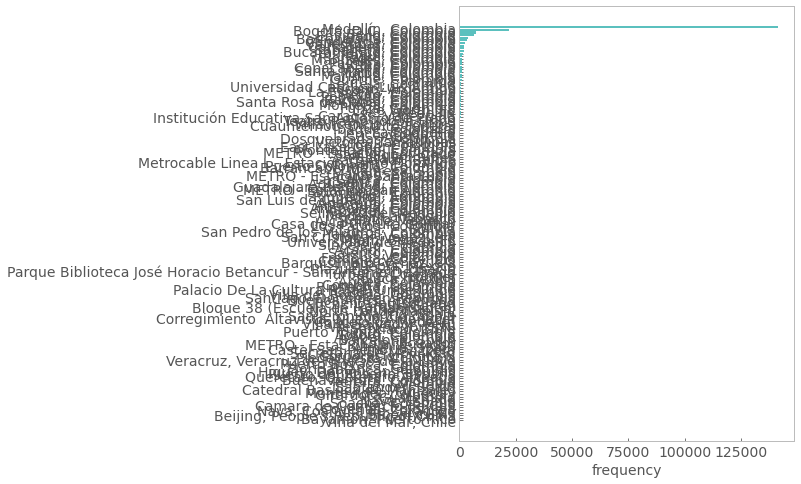

In [33]:
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(data_location.location, data_location.counts,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=14)


 
# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()

It is to be expected that most of the tweets are located in the city of Medellin because this word was used in the search. However, scattered locations were found that also refer to the target city. As an example, a tweet was extracted from the city of Arequipa, Peru and this was the result: "Now that they just gave us 3 goals, with Guerrero included, I'm going to uncork a Medellin and prepare a cuba while listening to Janis. Have a good night". The curious thing is that when he refers to Medellín he is not alluding to the city but to Ron Medellín liquor. This only corroborates that a word without context can lead us to unexpected results.

#### Time

In [34]:
data_tweet['day']=pd.to_datetime(data_tweet['date']).dt.day # creates a new column with the day of the week
data_tweet['month']=pd.to_datetime(data_tweet['date']).dt.month # creates a new column with the month of the tweet
data_tweet['year']=pd.to_datetime(data_tweet['date']).dt.year # creates a new column with the year
data_tweet['hour']=pd.to_datetime(data_tweet['date']).dt.hour # creates a new column with the hour of the day
data_tweet['day_of_week']=pd.to_datetime(data_tweet['date']).dt.dayofweek # creates a new column with the day of the week
data_tweet['month-year']=pd.to_datetime(data_tweet['date']).dt.strftime('%Y-%m')

In [35]:
data_tweet.head(10)

,Unnamed: 0,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,id_key_word,key_word,num_words,num_char,day,month,year,hour,day_of_week,month-year
0,0,Me acordé que a los colombianos de mi ex trab...,itslilysa,"Andes, Colombia",2020-01-10 22:51:09+00:00,1215768064697999362,0,0,0,1215768064697999362,8,trabajo,16,89,10,1,2020,22,4,2020-01
1,1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,LuzMarinaVelsq5,"Andes, Colombia",2020-01-10 22:06:30+00:00,1215756830246428672,0,1,0,1215743967326801922,8,trabajo,24,138,10,1,2020,22,4,2020-01
2,2,En Tierragro sabemos que la labor en el campo...,TIERRAGRO,"Andes, Colombia",2020-01-10 19:59:40+00:00,1215724912960294917,1,1,0,1215724912960294917,8,trabajo,44,269,10,1,2020,19,4,2020-01
3,3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,3puntospublicid,"Andes, Colombia",2020-01-10 19:17:54+00:00,1215714400289677313,0,0,0,1214949391913684998,8,trabajo,42,257,10,1,2020,19,4,2020-01
4,4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,HMadrid911,"Andes, Colombia",2020-01-10 18:09:24+00:00,1215697162471989248,0,1,1,1215388060294287361,8,trabajo,35,229,10,1,2020,18,4,2020-01
5,5,En Medellin los taxistas trabajan bien aunque...,Yanguis_,"Andes, Colombia",2020-01-10 18:02:34+00:00,1215695443008638977,6,46,4,1215695443008638977,8,trabajo,51,279,10,1,2020,18,4,2020-01
6,6,Buen trabajo el que ha hecho Miguel Ángel Her...,Pablo2h2,"Andes, Colombia",2020-01-10 17:44:07+00:00,1215690800077688832,0,2,1,1215690800077688832,8,trabajo,31,195,10,1,2020,17,4,2020-01
7,7,"Parce no, yo trabajo en Sabaneta y a veces sa...",SM_O22,"Andes, Colombia",2020-01-10 17:38:45+00:00,1215689448257675264,0,2,0,1215689448257675264,8,trabajo,30,169,10,1,2020,17,4,2020-01
8,8,"Con apoyo de @GPALegal, Caja de Compensación ...",LexLatin,"Andes, Colombia",2020-01-10 17:00:01+00:00,1215679700015562753,1,1,0,1215679700015562753,8,trabajo,30,205,10,1,2020,17,4,2020-01
9,9,@LeonAlexis724 @camiloe98 Desempleo? No lo he...,_Juandavii,"Andes, Colombia",2020-01-10 16:49:39+00:00,1215677092643442690,0,0,0,1215093267861327872,8,trabajo,37,219,10,1,2020,16,4,2020-01


In [36]:
data_tweet_day=data_tweet.groupby(['day']).size().reset_index(name="frequency").sort_values(by="day") # shows the number of tweets with each day of the week
data_tweet_month=data_tweet.groupby(['month']).size().reset_index(name="frequency").sort_values(by="month") # shows the number of tweets with each month of the year
data_tweet_year=data_tweet.groupby(['year']).size().reset_index(name="frequency").sort_values(by="year") # shows the number of tweets with each year
data_tweet_hour=data_tweet.groupby(['hour']).size().reset_index(name="frequency").sort_values(by="hour") # shows the number of tweets with each hour of the day
data_tweet_day_of_week=data_tweet.groupby(['day_of_week']).size().reset_index(name="frequency").sort_values(by="day_of_week") # shows the number of tweets with each day of the week
data_tweet_month_year=data_tweet.groupby(['month-year']).size().reset_index(name="frequency").sort_values(by="frequency") # shows the number of tweets with each month of the year
data_tweet_my=data_tweet.groupby(['month','year']).size().reset_index(name="frequency")
data_tweet_dmy=data_tweet.groupby(['day','month','year']).size().reset_index(name="frequency")


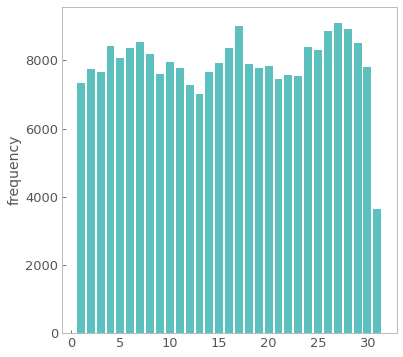

In [37]:
fig, ax = plt.subplots(figsize = (6,6))
plt.bar(data_tweet_day.day, data_tweet_day.frequency,color="#5BC0BE") # plots the number of tweets with each day of the week
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
plt.ylabel("frequency",size=14)
#plt.title("")
plt.show()

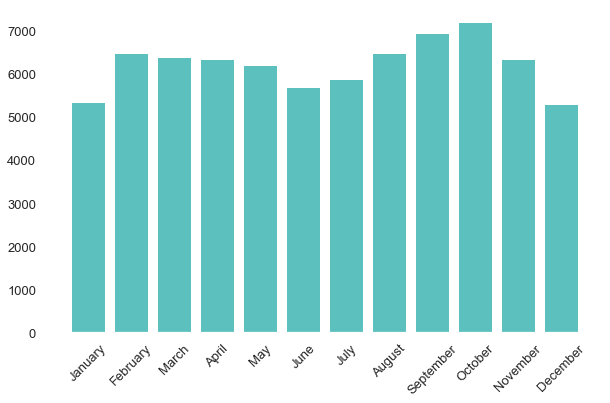

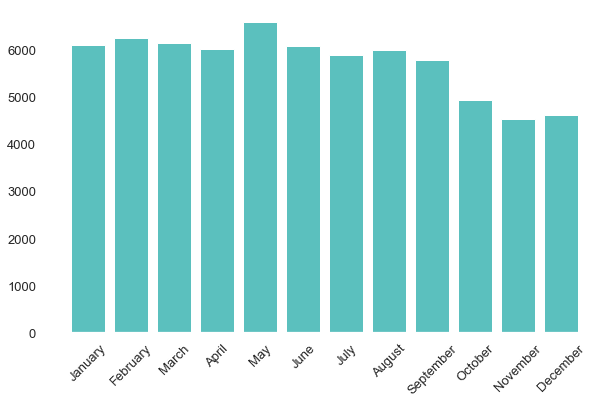

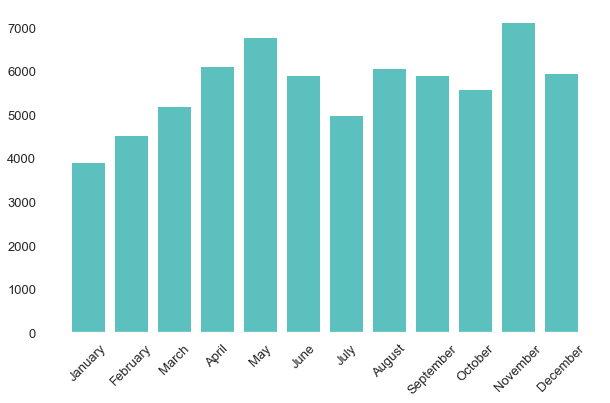

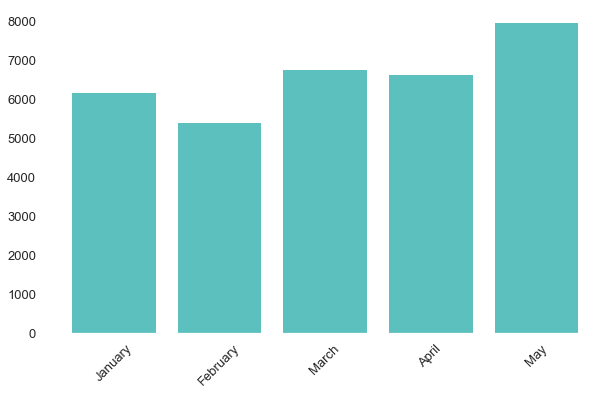

In [52]:
data_tweet_mypivot=pd.pivot_table(data_tweet_my,columns='year',values='frequency',index='month')
list_month=['January','February','March','April','May','June','July','August','September','October','November','December']
data_tweet_mypivot.index=list_month
#data_tweet_month['month']=list_month
for year in data_tweet_mypivot.columns:
    fig, ax = plt.subplots(figsize = (10,6))
    plt.bar(x=data_tweet_mypivot.index, height=data_tweet_mypivot[year],color="#5BC0BE") # plots the number of tweets with each month of the year
    # Later in the code
    ax.grid(False)
    ax.set_facecolor('xkcd:white')

    # setting label of y-axis
    #plt.ylabel("Location")
    ax.tick_params(labelsize=13) 

    # setting label of x-axis

    #plt.ylabel("frequency",size=14)
    #plt.title("")
    plt.xticks(rotation=45)
    plt.show()

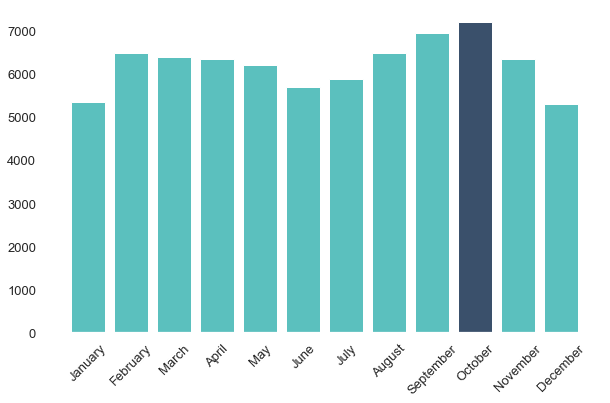

In [54]:
list_color=['#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#3A506B','#5BC0BE','#5BC0BE']
fig, ax = plt.subplots(figsize = (10,6))
plt.bar(x=data_tweet_mypivot.index, height=data_tweet_mypivot[2019],color=list_color) # plots the number of tweets with each month of the year
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis

#plt.ylabel("frequency",size=14)
#plt.title("")
plt.xticks(rotation=45)
plt.show()

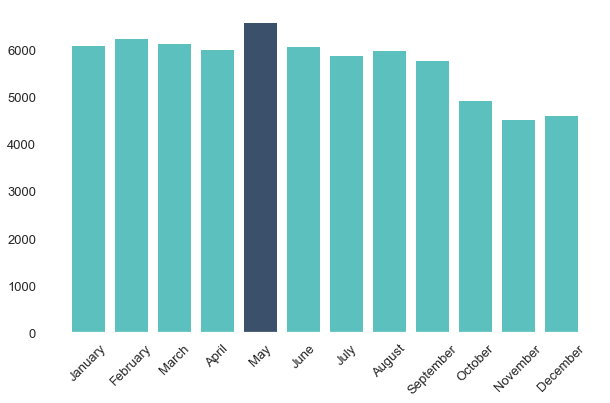

In [53]:
list_color=['#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#3A506B','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE']
fig, ax = plt.subplots(figsize = (10,6))
plt.bar(x=data_tweet_mypivot.index, height=data_tweet_mypivot[2020],color=list_color) # plots the number of tweets with each month of the year
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis

#plt.ylabel("frequency",size=14)
#plt.title("")
plt.xticks(rotation=45)
plt.show()

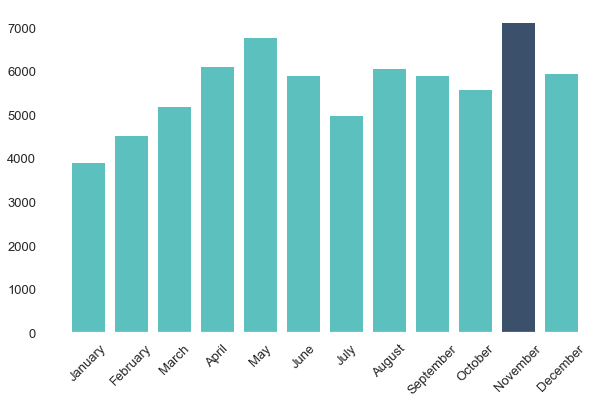

In [56]:
list_color=['#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#3A506B','#5BC0BE']
fig, ax = plt.subplots(figsize = (10,6))
plt.bar(x=data_tweet_mypivot.index, height=data_tweet_mypivot[2021],color=list_color) # plots the number of tweets with each month of the year
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis

#plt.ylabel("frequency",size=14)
#plt.title("")
plt.xticks(rotation=45)
plt.show()

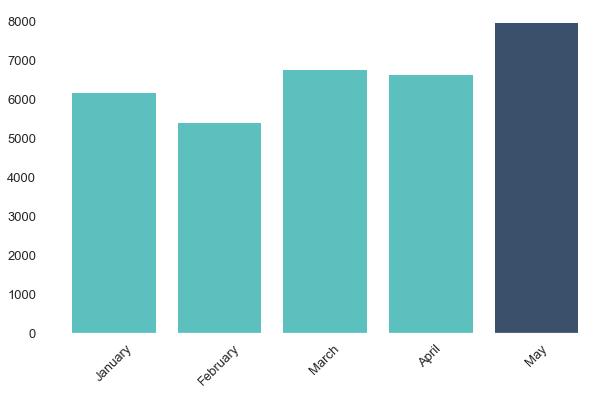

In [59]:
list_color=['#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#3A506B','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE','#5BC0BE']
fig, ax = plt.subplots(figsize = (10,6))
plt.bar(x=data_tweet_mypivot.index, height=data_tweet_mypivot[2022],color=list_color) # plots the number of tweets with each month of the year
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis

#plt.ylabel("frequency",size=14)
#plt.title("")
plt.xticks(rotation=45)
plt.show()

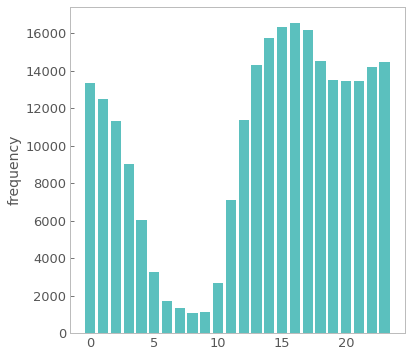

In [39]:
fig, ax = plt.subplots(figsize = (6,6))
plt.bar(data_tweet_hour.hour, data_tweet_hour.frequency,color="#5BC0BE") # plots the number of tweets with each day of the week
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
plt.ylabel("frequency",size=14)
#plt.title("")
plt.show()

In [40]:
def barmonthyear(month,year):
    data_tweet_dmyplot=data_tweet_dmy[(data_tweet_dmy['month']==month) & (data_tweet_dmy['year']==year)]
    data_tweet_dmyplot=data_tweet_dmyplot[['day','frequency']]
    fig, ax = plt.subplots(figsize = (6,6))
    plt.bar(data_tweet_dmyplot.day, data_tweet_dmyplot.frequency,color="#5BC0BE") # plots the number of tweets with each day of the week
    # Later in the code
    ax.grid(False)
    ax.set_facecolor('xkcd:white')

    # setting label of y-axis
    #plt.ylabel("Location")
    ax.tick_params(labelsize=13) 

    # setting label of x-axis
    plt.ylabel("frequency",size=14)
    #plt.title("")
    plt.show()
    

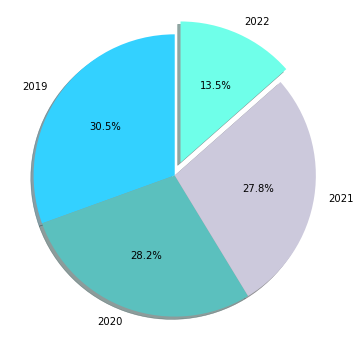

In [41]:
data_tweet_year['year']=data_tweet_year['year'].astype(str)
fig, ax = plt.subplots(figsize = (6,6))
explode=(0,0,0,0.1)
list_color=['#33D1FF','#5BC0BE','#CCC9DC','#6FFFE9']
plt.pie(data_tweet_year['frequency'],explode=explode,labels=data_tweet_year['year'],autopct='%1.1f%%',shadow=True, startangle=90,colors=list_color) # plots the number of tweets with each day of the week
ax.axis('equal')
# Later in the code
#ax.grid(False)
#ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
#plt.ylabel("frequency",size=14)
#plt.title("")
plt.show()

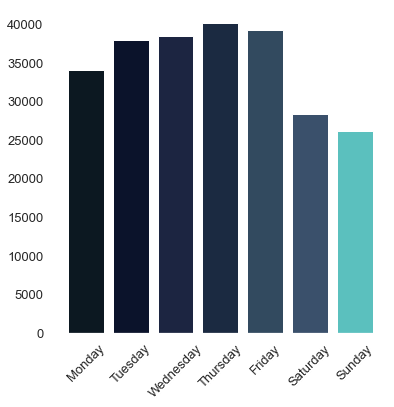

In [60]:
#5BC0BE
#6FFFE9
#CCC9DC
#0C1821
#1B2A41
#1C2541
list_color=['#0C1821','#0B132B','#1C2541','#1B2A41','#324A5F','#3A506B','#5BC0BE','#CCC9DC','#6FFFE9']
list_week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data_tweet_day_of_week['day_of_week']=list_week
fig, ax = plt.subplots(figsize = (6,6))
plt.bar(data_tweet_day_of_week.day_of_week, data_tweet_day_of_week.frequency,color=list_color) # plots the number of tweets with each day of the week
# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
#plt.ylabel("frequency",size=14)
plt.xticks(rotation=45)
#plt.title("")
plt.show()


#### Keyword

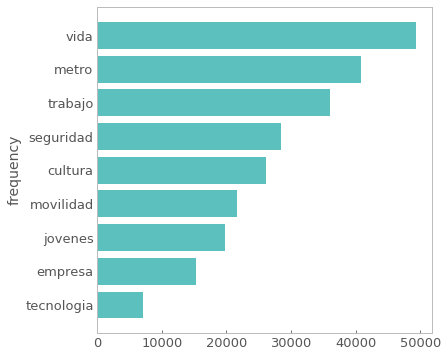

In [43]:
df_keyword=data_tweet.groupby(['key_word']).size().reset_index(name="frequency").sort_values(by="frequency") # shows the number of tweets with each day of the week
fig,ax=plt.subplots(figsize=(6,6))
plt.barh(df_keyword.key_word,df_keyword.frequency,color="#5BC0BE")
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.tick_params(labelsize=13)
plt.ylabel("frequency",size=14)
plt.show()

#### Tweet understanding

In [44]:
# import shape for our word cloud
char_mask = np.array(Image.open('figures/twitter.png'))

# figure size in inches
sns.set(rc={'figure.figsize':(5,16)})

# function to plot th word cloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(179, 44%%, %d%%)" % random.randint(30, 70)

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        contour_color="#1C2541",
                        contour_width=3,
                        max_words=2000).generate_from_frequencies(word_fre)
  # plotting the WordCloud
  # plot the word cloud 
  #0C1821
  #1B2A41
  #1C2541
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")

  #to remove axis value
  plt.axis('off')
  plt.show()

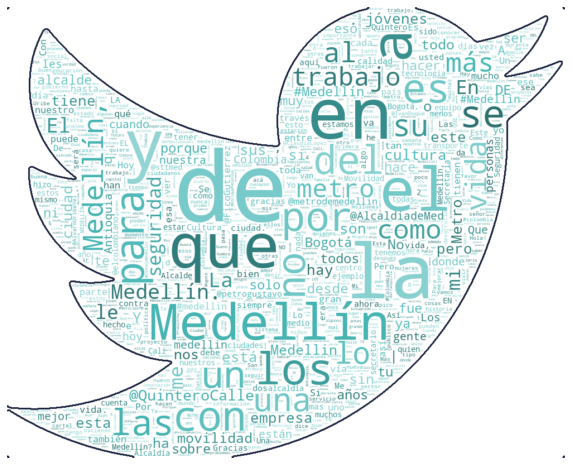

In [45]:
word_tweet_cloud=[]
for tweet in data_tweet['full_text']:
    for words in tweet.split():
        word_tweet_cloud.append(words)
word_fre = FreqDist(word_tweet_cloud)
plot_word_cloud(char_mask, word_fre)

In [46]:
word_fre.most_common(30)

[('de', 449494),
 ('la', 248277),
 ('en', 223301),
 ('y', 200303),
 ('que', 171656),
 ('el', 158748),
 ('a', 142510),
 ('Medellín', 109277),
 ('los', 81523),
 ('con', 70710),
 ('es', 67686),
 ('por', 67147),
 ('para', 66571),
 ('del', 64766),
 ('no', 62757),
 ('se', 58838),
 ('un', 56596),
 ('las', 51148),
 ('una', 41768),
 ('lo', 36086),
 ('su', 35539),
 ('vida', 33591),
 ('al', 29999),
 ('Medellín,', 29676),
 ('como', 26811),
 ('más', 26740),
 ('metro', 24893),
 ('trabajo', 24499),
 ('Medellín.', 22008),
 ('La', 21655)]

In [47]:
dict_to_df = {'word':[],'frequency':[]}
for key, value in word_fre.items():
  dict_to_df['word'].append(key)
  dict_to_df['frequency'].append(value)

# create a Df with th efrequency of each word
df_words = pd.DataFrame.from_dict(dict_to_df)
df_words=df_words.sort_values(by='frequency',ascending=False).head(30).sort_values(by='frequency',ascending=True)
df_words

,word,frequency
243,La,21655
292,Medellín.,22008
9,trabajo,24499
7801,metro,24893
542,más,26740
142,como,26811
184,"Medellín,",29676
381,al,29999
7660,vida,33591
115,su,35539


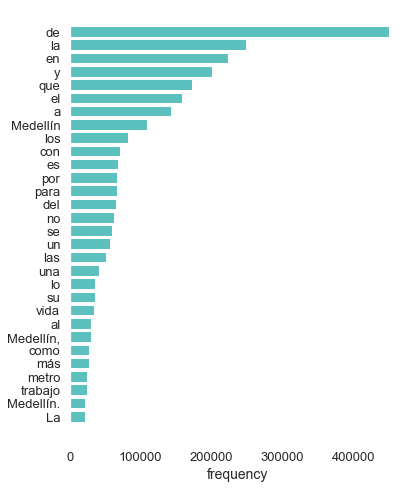

In [48]:
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(df_words.word, df_words.frequency,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()